# NSF Computer and Information Science and Engineering (CISE) 

- `05050000`: Division of Computer and Network Systems (CNS)
- `05010000`: Division of Computing and Communication Foundations (CCF)
- `05020000`: Division of Information and Intelligent Systems (IIS)
- `05090000`: Office of Advanced Cyberinfrastructure (OAC)

In [1]:
import os,sys,json
import core.nsf_utils
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from collections import Counter

In [2]:
grant_type = ["Standard Grant", "Continuing grant"] # draw only these types
div_type = {
    "05050000": "Division of Computer and Network Systems (CNS)",
    "05010000": "Division of Computing and Communication Foundations (CCF)",
    "05020000": "Division of Information and Intelligent Systems (IIS)",
    "05090000": "Office of Advanced Cyberinfrastructure (OAC)"
}

In [3]:
def num_pub_histogram(data, orgcode, pick_numbers):
    numpub_count = Counter([v["num_pubs"] for v in data.values() if v["org"] == orgcode])
#     print(numpub_count)
    x = range(1, 41)
    y = [numpub_count[i] if i in numpub_count else 0 for i in x]
    print("{} grants have #pub < 0".format(numpub_count[0]))
    print("{} grants have #pub > 40".format(sum(numpub_count.values())-sum(y)-numpub_count[0]))
    c = ["g" if i in pick_numbers else "b" for i in x]
    
    plt.figure(figsize=(18,3))
    plt.bar(x, y, color=c)
    plt.ylabel('Num of grants')
    plt.xlabel('Num of publications')
    plt.title("[NSF {} {}-{}] pub histogram".format(div_type[orgcode], years[0], years[-1]))
    plt.show()
    
    for pick_number in pick_numbers:
        citations = []
        for k, v in data.items():
            if v["org"] == orgcode and v["num_pubs"] == pick_number:
                grant_info = core.nsf_utils.get_grant_publications(k)
                pubresearch = grant_info["publicationResearch"]
                pubconference = grant_info["publicationConference"]
                citations.extend([p["citationCount"] for p in pubresearch])
                citations.extend([p["citationCount"] for p in pubconference])
#                 print(k)
#                 print([p["citationCount"] for p in pubresearch], [p["estCitation"] for p in pubconference])
        numcit_count = Counter(citations)

        x = range(0, 101)
        y = [numcit_count[i] if i in numcit_count else 0 for i in x]
        c = ["g" for i in x]
        print("Total {} grants with {} publications. Average {} citations from total {} publications"
              .format(numpub_count[pick_number], pick_number, np.mean(citations), len(citations)))
        print("{} publications have #citation > 100".format(sum(numcit_count.values())-sum(y)))
        plt.figure(figsize=(18,3))
        plt.bar(x, y, color=c)
        plt.ylabel('Num of publications')
        plt.xlabel('Num of citations per publication')
        plt.title("[NSF {} {}-{}] citation histogram".format(div_type[orgcode], years[0], years[-1]))
        plt.show()

In [4]:
def pub_avgcit_relation(data, orgcodes, xrange):
    pubs = [v["num_pubs"] for v in data.values() if v["org"] in orgcodes]
    x = [i for i in xrange if i in pubs]
    y = []
    for numpub in x:
        citations = []
        for k, v in data.items():
            if v["org"] in orgcodes and v["num_pubs"] == numpub:
                grant_info = core.nsf_utils.get_grant_publications(k)
                pubresearch = grant_info["publicationResearch"]
                pubconference = grant_info["publicationConference"]
                citations.extend([p["citationCount"] for p in pubresearch if "citationCount" in p])
                citations.extend([p["citationCount"] for p in pubconference if "citationCount" in p])
        y.append(np.mean(citations))

#     print(x, y)
#     plt.figure(figsize=(10,10))
    plt.plot(x, y, "o-")
    plt.ylabel('Num of citations per publication')
    plt.xlabel('Num of publications per grant')
    plt.title("[NSF {} {}-{}] average citation vs publications".format(orgcodes, years[0], years[-1]))
    plt.show()

In [5]:
data = {}
years = [2004]
for y in years:
    data.update(core.nsf_utils.load_numpub_data(y))
data = {k:v for k, v in data.items() if v["type"] in grant_type}
for y in years:
    print("[{}]".format(y))
    print("Total number of grants", len([v for v in data.values() if v["year"] == y]))
    for code, desc in div_type.items():
        print(desc, len([v for v in data.values() if v["org"] == code and v["year"] == y]))

[2004]
Total number of grants 10212
Division of Computer and Network Systems (CNS) 405
Division of Computing and Communication Foundations (CCF) 332
Division of Information and Intelligent Systems (IIS) 362
Office of Advanced Cyberinfrastructure (OAC) 53


150 grants have #pub < 0
14 grants have #pub > 40


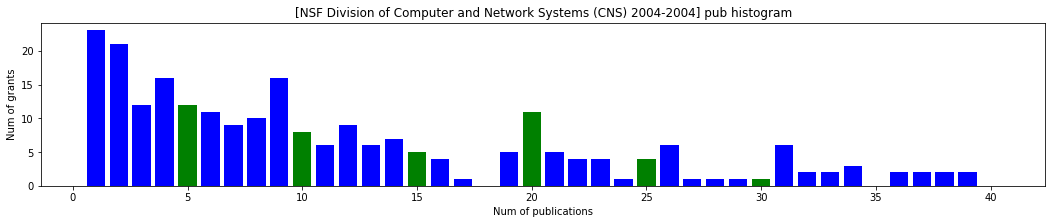

Total 12 grants with 5 publications. Average 53.81666666666667 citations from total 60 publications
9 publications have #citation > 100


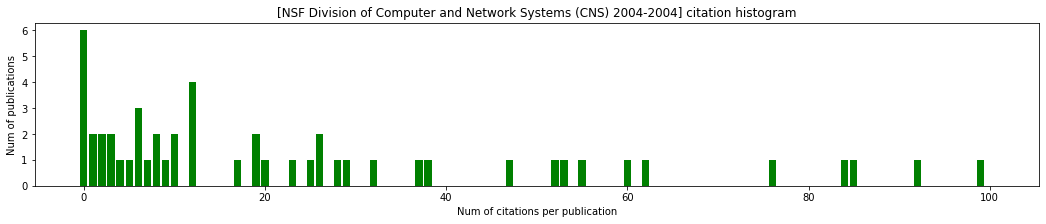

Total 8 grants with 10 publications. Average 39.95 citations from total 80 publications
7 publications have #citation > 100


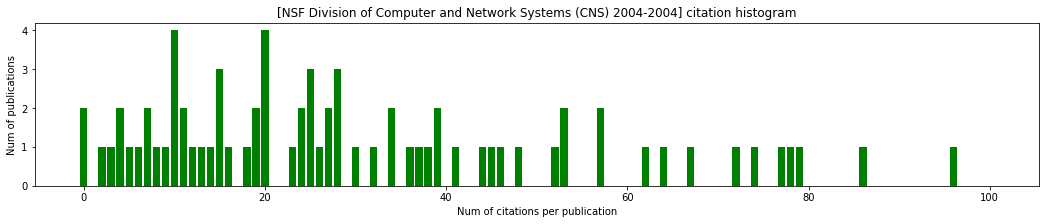

Total 5 grants with 15 publications. Average 36.24 citations from total 75 publications
6 publications have #citation > 100


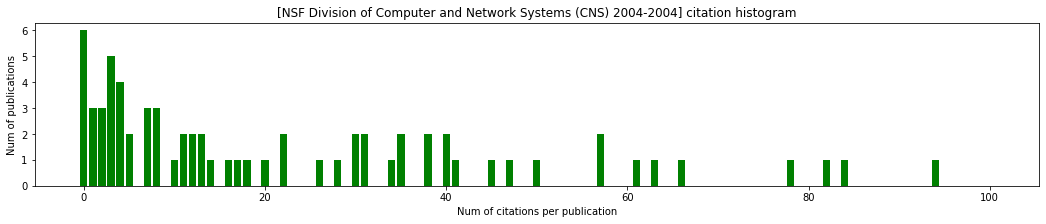

Total 11 grants with 20 publications. Average 49.018181818181816 citations from total 220 publications
27 publications have #citation > 100


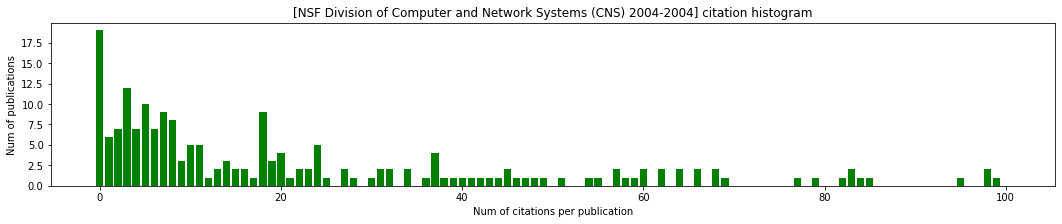

Total 4 grants with 25 publications. Average 40.72 citations from total 100 publications
9 publications have #citation > 100


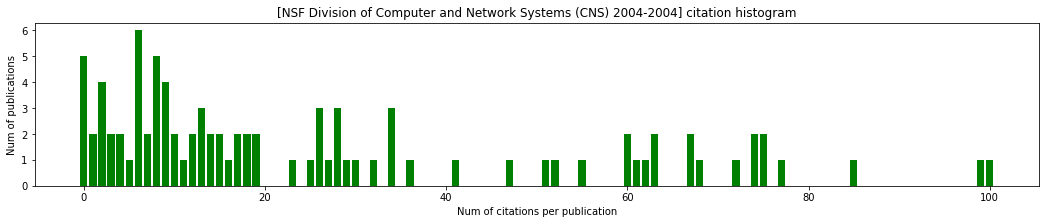

Total 1 grants with 30 publications. Average 28.466666666666665 citations from total 30 publications
2 publications have #citation > 100


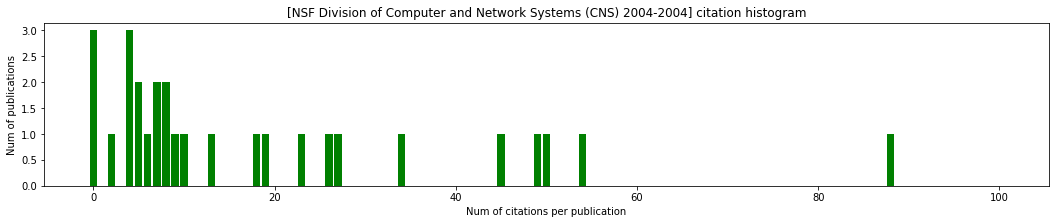

In [6]:
num_pub_histogram(data, "05050000", [5, 10, 15, 20, 25, 30])

121 grants have #pub < 0
4 grants have #pub > 40


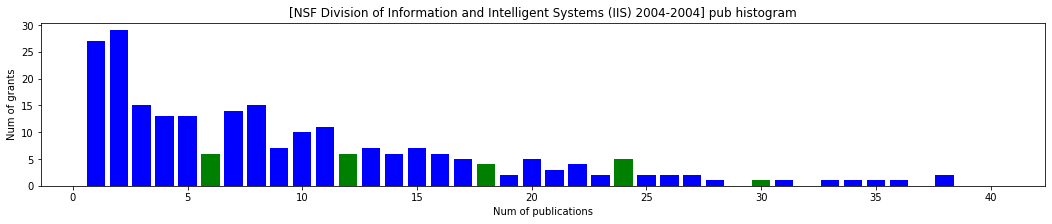

Total 6 grants with 6 publications. Average 49.27777777777778 citations from total 36 publications
4 publications have #citation > 100


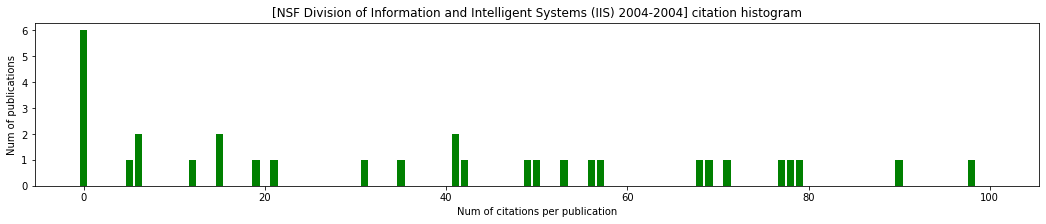

Total 6 grants with 12 publications. Average 54.27777777777778 citations from total 72 publications
10 publications have #citation > 100


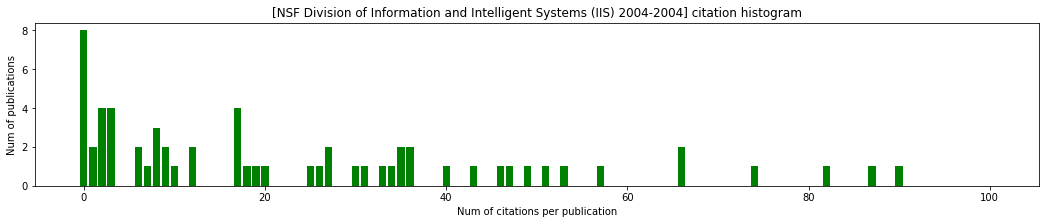

Total 4 grants with 18 publications. Average 86.18055555555556 citations from total 72 publications
10 publications have #citation > 100


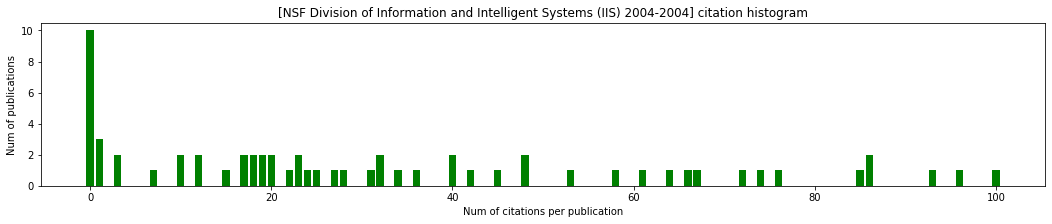

Total 5 grants with 24 publications. Average 56.1 citations from total 120 publications
14 publications have #citation > 100


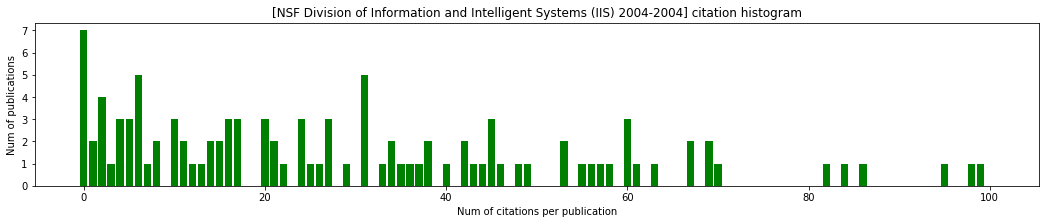

Total 1 grants with 30 publications. Average 43.333333333333336 citations from total 30 publications
3 publications have #citation > 100


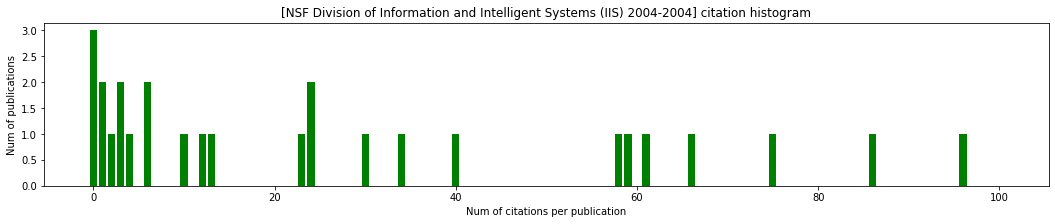

In [7]:
num_pub_histogram(data, "05020000", [6, 12, 18, 24, 30])

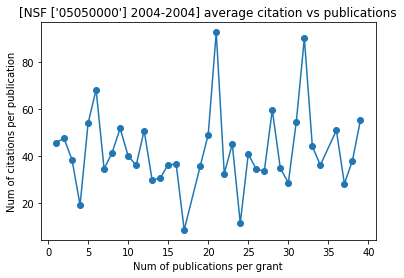

In [8]:
pub_avgcit_relation(data, ["05050000"], range(1, 41))

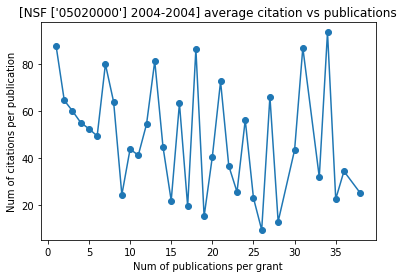

In [9]:
pub_avgcit_relation(data, ["05020000"], range(1, 41))

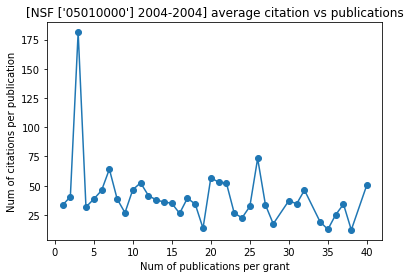

In [10]:
pub_avgcit_relation(data, ["05010000"], range(1, 41))

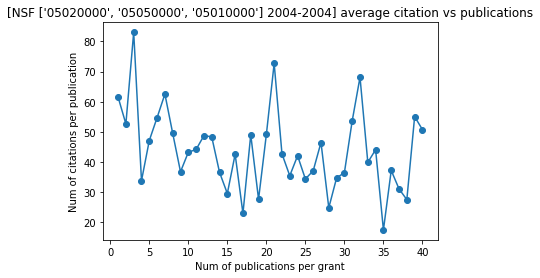

In [11]:
pub_avgcit_relation(data, ["05020000", "05050000", "05010000"], range(1, 41))

In [12]:
data = {}
years = [2009]
for y in years:
    data.update(core.nsf_utils.load_numpub_data(y))
data = {k:v for k, v in data.items() if v["type"] in grant_type}
for y in years:
    print("[{}]".format(y))
    print("Total number of grants", len([v for v in data.values() if v["year"] == y]))
    for code, desc in div_type.items():
        print(desc, len([v for v in data.values() if v["org"] == code and v["year"] == y]))

[2009]
Total number of grants 14758
Division of Computer and Network Systems (CNS) 733
Division of Computing and Communication Foundations (CCF) 535
Division of Information and Intelligent Systems (IIS) 627
Office of Advanced Cyberinfrastructure (OAC) 193


219 grants have #pub < 0
9 grants have #pub > 40


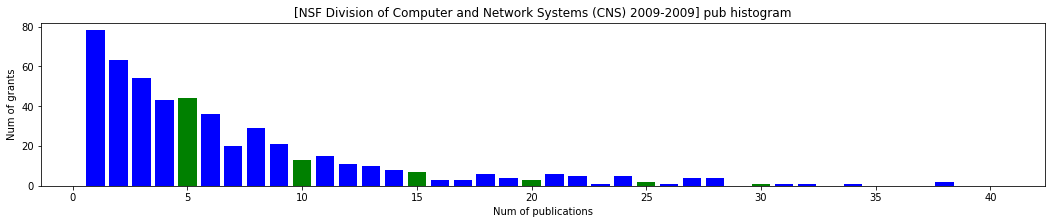

Total 44 grants with 5 publications. Average 27.477272727272727 citations from total 220 publications
10 publications have #citation > 100


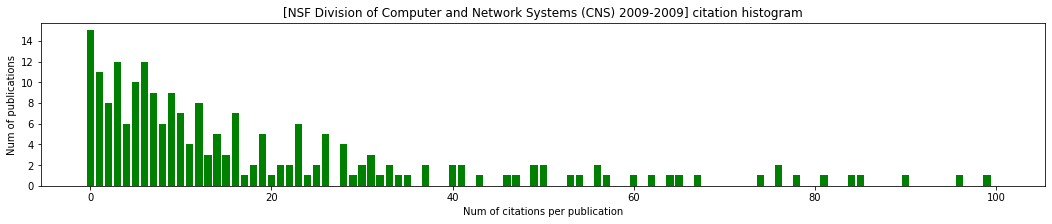

Total 13 grants with 10 publications. Average 67.29230769230769 citations from total 130 publications
19 publications have #citation > 100


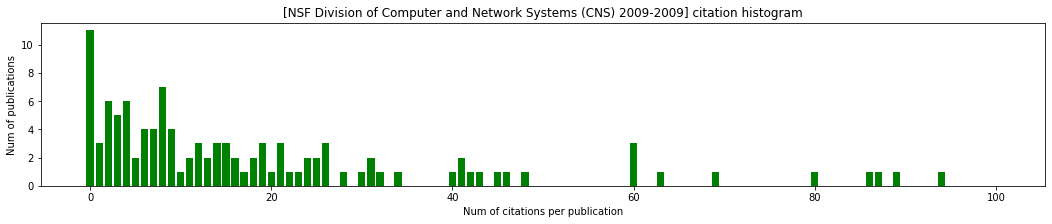

Total 7 grants with 15 publications. Average 25.38095238095238 citations from total 105 publications
3 publications have #citation > 100


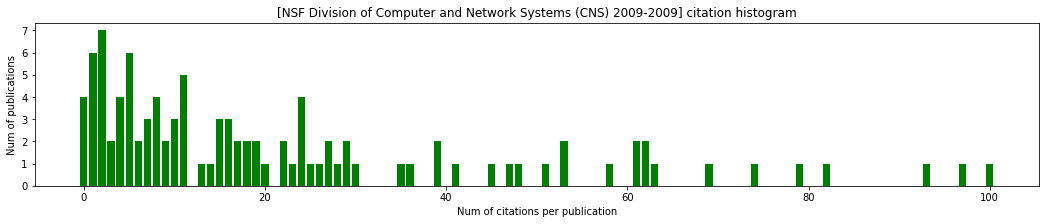

Total 3 grants with 20 publications. Average 18.733333333333334 citations from total 60 publications
2 publications have #citation > 100


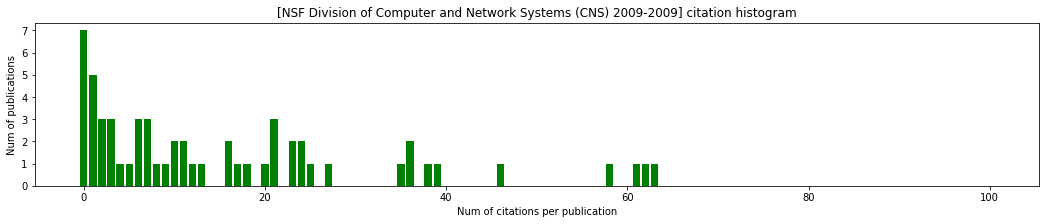

Total 2 grants with 25 publications. Average 24.38 citations from total 50 publications
2 publications have #citation > 100


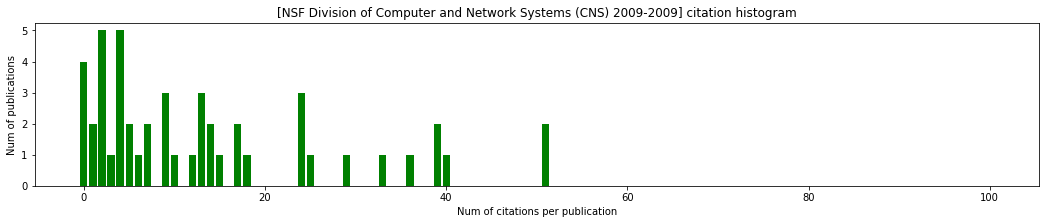

Total 1 grants with 30 publications. Average 46.666666666666664 citations from total 30 publications
2 publications have #citation > 100


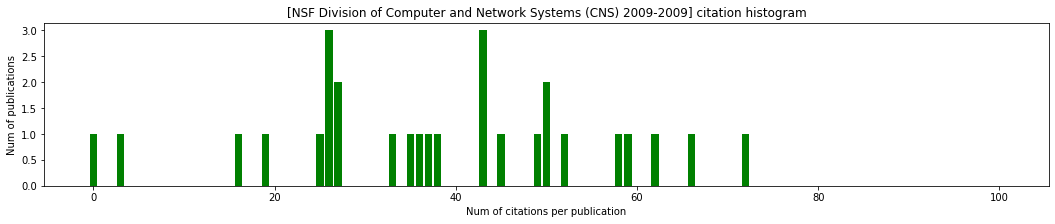

In [13]:
num_pub_histogram(data, "05050000", [5, 10, 15, 20, 25, 30])

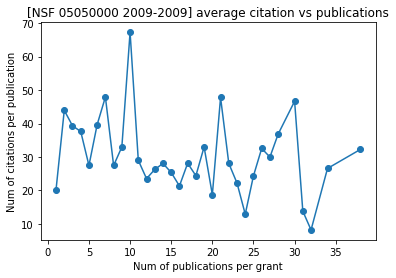

In [14]:
pub_avgcit_relation(data, "05050000", range(1, 41))

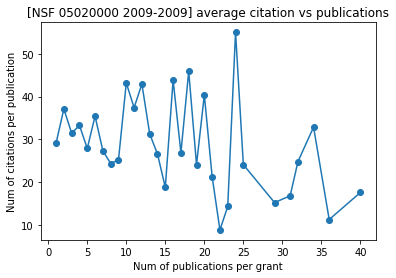

In [15]:
pub_avgcit_relation(data, "05020000", range(1, 41))

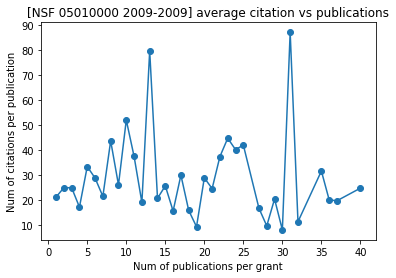

In [17]:
pub_avgcit_relation(data, "05010000", range(1, 41))

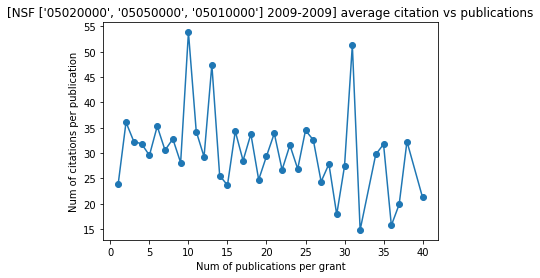

In [18]:
pub_avgcit_relation(data, ["05020000", "05050000", "05010000"], range(1, 41))